In [1]:
import MDAnalysis as mda
from MDAnalysis.tests.datafiles import MULTIPDB_HOLE
from MDAnalysis.analysis import hole2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

ModuleNotFoundError: No module named 'MDAnalysis'

In [36]:
u = mda.Universe("reduced_model_124_ions.psf", "03_equil_124_ions_10ns_first.dcd", in_memory=True, in_memory_step=1)

In [37]:
u.trajectory

<MemoryReader with 501 frames of 58630 atoms>

In [38]:
#u2 = mda.Universe("files/07_equil_74_ions_sodium.psf", "new.dcd") 
ha = hole2.HoleAnalysis(u, select='protein', cpoint= [10.6460, -8.558, -0.027], cvect= [1,0,0], executable='/Users/sukanyakonar/Downloads/hole2-master/exe/hole', sample=0.42, end_radius=22, vdwradii_file=None)
ha.run(random_seed=31415)

In [27]:
gathered = ha.gather()
print(gathered.keys())

dict_keys(['rxn_coord', 'radius', 'cen_line_D'])


In [28]:
print(len(gathered['rxn_coord']))

501


In [29]:
gathered['rxn_coord']

[array([-4.7354e+01, -4.7204e+01, -4.7054e+01, -4.6904e+01, -4.6754e+01,
        -4.6604e+01, -4.6454e+01, -4.6304e+01, -4.6154e+01, -4.6004e+01,
        -4.5854e+01, -4.5704e+01, -4.5554e+01, -4.5404e+01, -4.5254e+01,
        -4.5104e+01, -4.4954e+01, -4.4804e+01, -4.4654e+01, -4.4504e+01,
        -4.4354e+01, -4.4204e+01, -4.4054e+01, -4.3904e+01, -4.3754e+01,
        -4.3604e+01, -4.3454e+01, -4.3304e+01, -4.3154e+01, -4.3004e+01,
        -4.2854e+01, -4.2704e+01, -4.2554e+01, -4.2404e+01, -4.2254e+01,
        -4.2104e+01, -4.1954e+01, -4.1804e+01, -4.1654e+01, -4.1504e+01,
        -4.1354e+01, -4.1204e+01, -4.1054e+01, -4.0904e+01, -4.0754e+01,
        -4.0604e+01, -4.0454e+01, -4.0304e+01, -4.0154e+01, -4.0004e+01,
        -3.9854e+01, -3.9704e+01, -3.9554e+01, -3.9404e+01, -3.9254e+01,
        -3.9104e+01, -3.8954e+01, -3.8804e+01, -3.8654e+01, -3.8504e+01,
        -3.8354e+01, -3.8204e+01, -3.8054e+01, -3.7904e+01, -3.7754e+01,
        -3.7604e+01, -3.7454e+01, -3.7304e+01, -3.7

In [30]:
flat = ha.gather(flat=True)
print(len(flat['rxn_coord']))

315519


In [31]:
radii, edges = ha.bin_radii(bins=100, range=None)
means, edges = ha.histogram_radii(bins=100, range=None, aggregator=np.mean)

Text(0.5, 0, 'Pore coordinate $\\zeta$ ($\\AA$)')

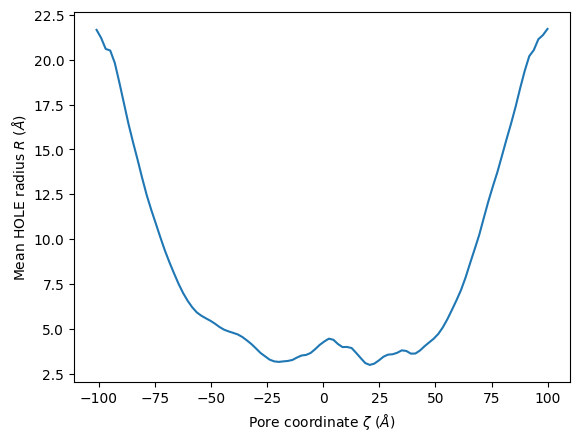

In [32]:
midpoints = 1.0*(edges[1:]+edges[:-1])
plt.plot(midpoints, means)
plt.ylabel(r"Mean HOLE radius $R$ ($\AA$)")
plt.xlabel(r"Pore coordinate $\zeta$ ($\AA$)")

In [33]:
dat = np.array([midpoints, means])
dat = dat.T
np.savetxt('data_test_hole2_0.30_40ns.cpoint_9.64-test.txt', dat)

In [32]:
ha.create_vmd_surface(filename='channe2_45ns.vmd', dot_density=15, double_water_color='blue')

'channe2_45ns.vmd'

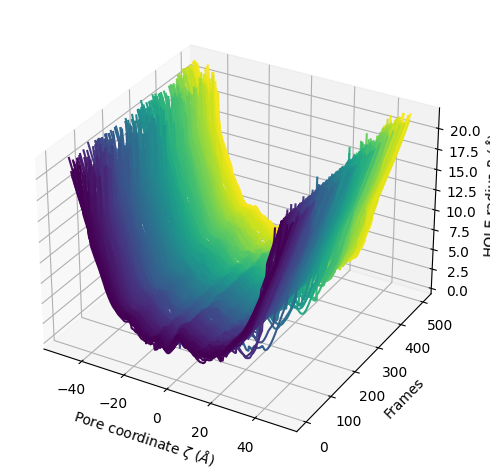

In [137]:
ha.plot3D()
plt.savefig('channel2.3D.20ns.jpg', bbox_inches='tight', dpi=400)

In [35]:
ha.delete_temporary_files()
ha.tmp_files

[]